## 모두의 컴퍼니
### 3주차 과제 제출에 포함되어야 하는 형태 (최소)
#### 모델링에 대한 결과 .ipynb 파일
#### Input : X데이터 : [user_id, +@]
#### Output : Count column 예측값
#### 2020.01.01~2020.09.30 : Training Data
#### 2020.10.01~2020.12.31 : Test Data
#### 2020.10.01~2020.12.31 구간에 대한 MSE, MAE 계산값
#### 요일별 이용량에 대한 분석 - EDA
#### 유저별 이용 count 값에 대한 분석 - EDA

### 정보

•	유저 가입 정보: id, 가입일  
•	소비 행동 정보: 상품id, 점포 주소, 결제일, 결제건수  
•	외부 정보: 서울시 지점별 교통량 데이터 기온, 강수량, 풍속 등 기상데이터  

In [59]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
np.random.seed(42) 

In [3]:
df= pd.read_csv('실전db.csv',encoding='cp949')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
USER_ID       879271 non-null int64
JOIN_DATE     879271 non-null object
D_TYPE        879271 non-null object
STORE_ID      879271 non-null int64
GOODS_TYPE    879271 non-null object
DATE          879271 non-null object
COUNT         879271 non-null int64
AD1           879271 non-null object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


- 종속변수 분리

In [5]:
df.columns=[i.lower() for i in df.columns.values]

#### 전처리

In [6]:
df['join_date']=pd.to_datetime(df['join_date'])
df['date']=pd.to_datetime(df['date'])

In [7]:
df['j_y']=df['join_date'].dt.year
df['j_m']=df['join_date'].dt.month
df['j_day']=df['join_date'].dt.day
df['j_wday']=df['join_date'].dt.weekday
df['p_y']=df['date'].dt.year
df['p_m']=df['date'].dt.month
df['p_day']=df['date'].dt.day
df['p_wday']=df['date'].dt.weekday

In [9]:
Train_X=df.loc[df['date']<'20201001',:].drop('count',axis=1)
Train_y=df.loc[df['date']<'20201001','count']
Train_X=Train_X.drop(['join_date','date'],axis=1)
Test_X=df.loc[df['date']>='20201001',:].drop('count',axis=1)
Test_X=Test_X.drop(['join_date','date'],axis=1)
Test_y=df.loc[df['date']>='20201001','count']

In [10]:
Train_X

,user_id,d_type,store_id,goods_type,ad1,j_y,j_m,j_day,j_wday,p_y,p_m,p_day,p_wday
0,2858,AA,1892,A,GN,2014,1,7,1,2020,1,1,2
1,5647,BB,182009,A,J,2014,2,14,4,2020,1,1,2
2,33314,BB,82431,A,SC,2014,11,20,3,2020,1,1,2
3,37001,BB,725,C,MP,2014,12,4,3,2020,1,1,2
4,37819,AA,220691,C,JRR,2014,12,7,6,2020,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623574,1709914,BB,221022,B,GN,2020,9,30,2,2020,9,30,2
623575,1709935,AA,725,B,MP,2020,9,30,2,2020,9,30,2
623576,1709942,AA,223058,B,BF,2020,9,30,2,2020,9,30,2
623577,1709950,BB,182320,A,JRR,2020,9,30,2,2020,9,30,2


In [11]:
Test_X

,user_id,d_type,store_id,goods_type,ad1,j_y,j_m,j_day,j_wday,p_y,p_m,p_day,p_wday
623579,15521,AA,182320,A,JRR,2014,9,12,4,2020,10,1,3
623580,17651,BB,82434,D,J,2014,9,19,4,2020,10,1,3
623581,26388,BB,182320,A,JRR,2014,10,25,5,2020,10,1,3
623582,81772,BB,204438,A,DJ,2015,5,2,5,2020,10,1,3
623583,92258,AA,220745,A,SD,2015,5,24,6,2020,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,BB,219886,B,GN,2020,12,31,3,2020,12,31,3
879267,1830570,BB,82433,B,CY,2020,12,31,3,2020,12,31,3
879268,1830580,AA,92020,B,JRR,2020,12,31,3,2020,12,31,3
879269,1830589,BB,92437,B,J,2020,12,31,3,2020,12,31,3


In [12]:
Train_y

0         1
1         1
2         1
3         1
4         1
         ..
623574    1
623575    1
623576    1
623577    2
623578    1
Name: count, Length: 623579, dtype: int64

In [13]:
Test_y

623579    1
623580    1
623581    1
623582    1
623583    1
         ..
879266    1
879267    1
879268    1
879269    1
879270    1
Name: count, Length: 255692, dtype: int64

In [14]:
col1=Train_X.columns.values

train_numcol=[]
train_strcol=[]
for i in col1:
    if Train_X[i].dtype == 'int64':
        train_numcol.append(i)
    elif Train_X[i].dtype == 'object':
        train_strcol.append(i)
        

In [15]:
col2=Test_X.columns.values
test_numcol=[]
test_strcol=[]
for i in col1:
    if Train_X[i].dtype == 'int64':
        test_numcol.append(i)
    elif Train_X[i].dtype == 'object':
        test_strcol.append(i)

In [16]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Train_X.loc[:,train_numcol]=scaler.fit_transform(Train_X.loc[:,train_numcol])
Train_X.loc[:,train_numcol]=scaler.fit_transform(Train_X.loc[:,test_numcol])

In [17]:
# 인코딩
Train_X=pd.get_dummies(Train_X)
Test_X=pd.get_dummies(Test_X)

In [18]:
a1=Train_X.columns.values

In [19]:
b1=Test_X.columns.values

In [20]:
# test에 없는 train 컬럼
l12=[]
for i in a1:
    if i not in b1:
        l12.append(i)
l12

['ad1_NW', 'ad1_SP', 'ad1_WOID']

In [21]:
# train에 없는 test 컬럼
l11=[]
for i in b1:
    if i not in a1:
        l11.append(i)
l11

['ad1_ADS', 'ad1_CVB', 'ad1_DY', 'ad1_GR', 'ad1_VO', 'ad1_WH', 'ad1_X']

In [22]:
Train_X=Train_X.drop(l12,axis=1)

In [23]:
Test_X=Test_X.drop(l11,axis=1)

#### 모델링

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_reg=XGBRegressor(random_state=42)

#params = [{ 'max_depth' : [3,7,10]}]

#girdcv=GridSearchCV(estimator=xgb_reg,
#                       param_grid=params,
#                       scoring='neg_mean_squared_error',
#                       cv=5)

xgb_reg.fit(Train_X,Train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# grid_df = pd.DataFrame(girdcv.cv_results_)
# grid_df.loc[:, ['mean_test_score', "params"]]

In [26]:
y_pred=xgb_reg.predict(Test_X)

In [30]:
y_pred

array([1.2401667, 1.3596953, 1.3790308, ..., 1.315097 , 1.3904377,
       1.140287 ], dtype=float32)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
l_mse=[]
for i in range(len(y_pred)):
    
    l_mse.append(mean_absolute_error(i,j))

IndentationError: expected an indented block (<ipython-input-31-6cea0bf08cd7>, line 3)

In [48]:
Test_y

623579    1
623580    1
623581    1
623582    1
623583    1
         ..
879266    1
879267    1
879268    1
879269    1
879270    1
Name: count, Length: 255692, dtype: int64

In [37]:
Test_y

623579    1
623580    1
623581    1
623582    1
623583    1
         ..
879266    1
879267    1
879268    1
879269    1
879270    1
Name: count, Length: 255692, dtype: int64

#### MSE

In [51]:
mean_squared_error(Test_y,y_pred)

0.24338798022413347

#### MAE

In [29]:
mean_squared_error(Test_y,y_pred)

0.24338798022413347

***

### 요일별 이용량에 대한 분석 - EDA
#### 요일별 이용량 단순 count
- 금>목>수>토>화>월>일순으로 데이터가 있고, 일요일이 다른 요일에 비해 상당히 적음

In [8]:
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,j_y,j_m,j_day,j_wday,p_y,p_m,p_day,p_wday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014,1,7,1,2020,1,1,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014,2,14,4,2020,1,1,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014,11,20,3,2020,1,1,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014,12,4,3,2020,1,1,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014,12,7,6,2020,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,12,31,3,2020,12,31,3
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,12,31,3,2020,12,31,3
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,12,31,3,2020,12,31,3
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,12,31,3,2020,12,31,3


In [128]:
df['count'].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
16        21
12        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
17        15
23        15
21        14
18        14
25        14
19        13
22         9
32         9
26         9
27         7
24         7
30         7
31         7
34         7
29         6
20         6
36         5
40         4
37         3
39         3
38         3
46         3
49         3
35         3
42         2
43         2
33         2
50         2
47         2
55         1
53         1
51         1
58         1
41         1
48         1
45         1
44         1
59         1
61         1
Name: count, dtype: int64

In [78]:
df.groupby(df.date.dt.day_name())['count'].sum().sort_values(ascending=False)

date
Friday       141837
Thursday     137323
Wednesday    136034
Saturday     135906
Tuesday      134288
Monday       130447
Sunday        89004
Name: count, dtype: int64

- 그래프

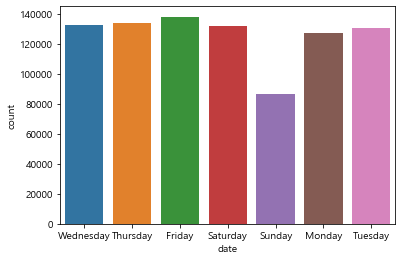

In [69]:
sns.countplot(x= df.date.dt.day_name(), data=df)

#### 집계 기간동안의 고객은 총 165,425명

In [122]:
len(df.user_id.unique())

165425

In [80]:
# 이게 뭘까요?
df.d_type.unique()

array(['AA', 'BB', 'CC'], dtype=object)

#### 집계 기간동안의 점포는 총 11,061개

In [91]:
len(df.store_id.unique())

1061

#### 전체 기간의 점포별 고객 수 (점포 220557가 17,617명의 고객을 유치함)

In [105]:
suc=df.groupby('store_id')['user_id'].count().sort_values(ascending=False)
suc

store_id
220557    17617
220893    17220
220655    16275
220848    15935
92437     15866
          ...  
225676        1
225668        1
225667        1
225660        1
223169        1
Name: user_id, Length: 1061, dtype: int64

In [124]:
df.groupby('store_id')['user_id'].value_counts().cumsum()

store_id  user_id
4         1531392         3
          372116          5
          435701          6
          538511          7
          629741          8
                      ...  
231465    1632485    879267
          1666377    879268
          1733085    879269
          1829686    879270
          1829689    879271
Name: user_id, Length: 321606, dtype: int64

In [121]:
suc.cumsum()

store_id
220557     17617
220893     34837
220655     51112
220848     67047
92437      82913
           ...  
225676    879267
225668    879268
225667    879269
225660    879270
223169    879271
Name: user_id, Length: 1061, dtype: int64

#### 가게당 점포수가 4개 이전이 가장 빈도수가 많음

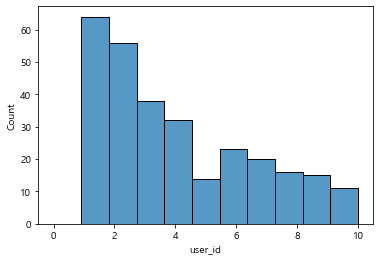

In [119]:
sns.histplot(suc,binrange=(0,10))

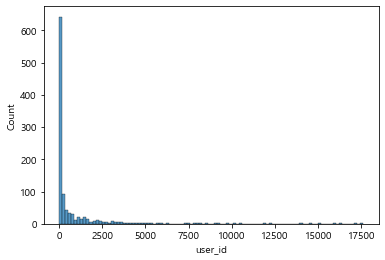

In [120]:
sns.histplot(suc,bins=100)

#### 76 종류의 광고이벤트가 존재함

In [72]:
len(df.ad1.value_counts().unique())

76

In [82]:
df.ad1.unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

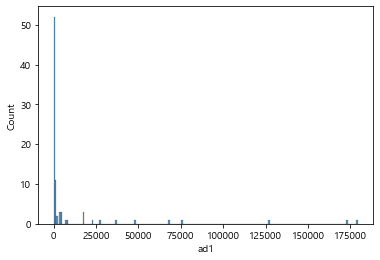

In [76]:
sns.histplot(df.ad1.value_counts())

#### 1061개의 매장이 존재함

In [87]:
len(df.store_id.unique())

1061